# Life Expectancy and Prevalence of Mental Health Disorders

# 1. Background

The original dataset i.e. Life Expectancy contains 2938 entries with 25 columns by Marya Lebron while the second data set i.e. Global Trends in Mental Health Disorder contains 108553 entries and 11 columns by https://data.world/amitd. The data sets were obtained from Kaggle.

The 2 data sets used contain informative data from countries across the globe about;
1. Factors that affect life expectancy in men and women such as status of the country, adult mortality, infant deaths, expenditure, immunization coverage etc.

2. The prevalence of mental health disorders including schizophrenia, bipolar disorder, eating disorders, anxiety disorders, drug use disorders, depression, alcohol use disorders.

The data sources;

Life Expectancy Data by Country available here; https://www.kaggle.com/datasets/maryalebron/life-expectancy-data

Global Trends in Mental Health Disorder available here; https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder

# 2. Objectives

The objectives of the analysis are as follows:

1. To see how life expectancy compares between men and women for our selected sample data sets inclusive of developed and developing countries where the developing countries are with East African Community and the 5 developed countries are within Europe.

2. To visualise the prevalence of mental health disorders comparing and contrasting depression, anxiety, bipolar disorder, 
   schizophrenia, eating disorders, alcohol use disorder and drug use disorder across the sample countries in 2015. 
   
3. To demonstrate and visualise whether lower life expectancy means higher drug user disorder rates for the various countries.


Start by loading the required libraries;

In [49]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# 3. Data

In [4]:
#Load the first data set i.e. life expectancy data

df1 = pd.read_csv("C:/Users/kinyanjuim/Desktop/Project2_Groupwork/life expectancy data/Life_Expectancy_Data_v2.csv")

In [5]:
#Load the second data set i.e. Global Trends in Mental Health Disorder

df2 = pd.read_csv("C:/Users/kinyanjuim/Desktop/Project2_Groupwork/mental health data/Mental_health_Depression_disorder_Data.csv", 
                  low_memory=False)

In [10]:
#Overview of the columns in df1

print(df1.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy (men)',
       'Life expectancy(women)', 'Adult Mortality (men)',
       'Adult Mortality (women)', 'Infant deaths', 'Alcohol',
       'Percentage expenditure', 'Hepatitis B(men)', 'Hepatitis B(women)',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [11]:
#Overview of the columns in df2

print(df2.columns)

Index(['index', 'Entity', 'Code', 'Year', 'Schizophrenia (%)',
       'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)'],
      dtype='object')


In [12]:
# Information about the data attributes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy (men)            2938 non-null   int64  
 4   Life expectancy(women)           2938 non-null   int64  
 5   Adult Mortality (men)            2938 non-null   int64  
 6   Adult Mortality (women)          2938 non-null   int64  
 7   Infant deaths                    2938 non-null   int64  
 8   Alcohol                          2744 non-null   float64
 9   Percentage expenditure           2938 non-null   float64
 10  Hepatitis B(men)                 2938 non-null   int64  
 11  Hepatitis B(women)               2938 non-null   int64  
 12  Measles             

In [13]:
# Information about the data attributes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


In [14]:
# Renaming the Entity column in df2 to Country
df2.rename(columns = {'Entity':'Country'}, inplace = True)

In [15]:
# Omitting any row from 6468 as it's a different data set
df3 = df2[:6468]

In [16]:
# Checking that the data we now have is good
df3.tail()

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6463,6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269
6467,6467,Zimbabwe,ZWE,2017,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943


In [17]:
# Changing Year from object to numeric
df3['Year'] = pd.to_numeric(df3['Year'])

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_10912\3310461350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = pd.to_numeric(df3['Year'])


In [18]:
# Checking if fine
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      6468 non-null   int64  
 1   Country                    6468 non-null   object 
 2   Code                       5488 non-null   object 
 3   Year                       6468 non-null   int64  
 4   Schizophrenia (%)          6468 non-null   object 
 5   Bipolar disorder (%)       6468 non-null   object 
 6   Eating disorders (%)       6468 non-null   object 
 7   Anxiety disorders (%)      6468 non-null   float64
 8   Drug use disorders (%)     6468 non-null   float64
 9   Depression (%)             6468 non-null   float64
 10  Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 556.0+ KB


In [19]:
# Filtering the year 2015 for df3
df4 = df3.loc[df3['Year'] == 2015]

In [20]:
# Filtering the year 2015 for df1
df5=df1.loc[df1['Year'] == 2015]

In [21]:
# Overview of the 1st 5 rows
df4.head()

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
25,25,Afghanistan,AFG,2015,0.165895,0.707275,0.104445,4.875201,2.543144,4.135419,0.662276
53,53,Albania,ALB,2015,0.20063,0.704161,0.171095,3.388212,0.513158,2.204454,1.850252
81,81,Algeria,DZA,2015,0.197728,0.817862,0.211434,5.058398,1.709814,3.636962,0.665817
109,109,American Samoa,ASM,2015,0.248981,0.468434,0.179144,3.316201,0.769507,2.936809,1.141513
137,137,Andean Latin America,NaN,2015,0.200693,0.881143,0.350127,4.266704,0.667189,2.605462,1.548874


In [22]:
# Overview of the 1st 5 rows
df5.head()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,78,66,97,68,0,4.60,364.975229,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,84,71,52,81,21,NaN,0.000000,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,73,71,93,59,66,NaN,0.000000,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,71,56,58,85,0,NaN,0.000000,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [23]:
# Merging the 2 data sets on Country
merged_data = pd.merge(df4, df5,on='Country' )

In [24]:
# Attributes of the data sets and types
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            162 non-null    int64  
 1   Country                          162 non-null    object 
 2   Code                             162 non-null    object 
 3   Year_x                           162 non-null    int64  
 4   Schizophrenia (%)                162 non-null    object 
 5   Bipolar disorder (%)             162 non-null    object 
 6   Eating disorders (%)             162 non-null    object 
 7   Anxiety disorders (%)            162 non-null    float64
 8   Drug use disorders (%)           162 non-null    float64
 9   Depression (%)                   162 non-null    float64
 10  Alcohol use disorders (%)        162 non-null    float64
 11  Year_y                           162 non-null    int64  
 12  Status                

In [25]:
# merged_data.to_csv('merged_data.csv')

In [26]:
# Dropping columns we don't need
# axis = 1 means columns

mdata = merged_data.drop(merged_data.columns[[0, 2, 11, 31,32,34]], axis=1)
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          162 non-null    object 
 1   Year_x                           162 non-null    int64  
 2   Schizophrenia (%)                162 non-null    object 
 3   Bipolar disorder (%)             162 non-null    object 
 4   Eating disorders (%)             162 non-null    object 
 5   Anxiety disorders (%)            162 non-null    float64
 6   Drug use disorders (%)           162 non-null    float64
 7   Depression (%)                   162 non-null    float64
 8   Alcohol use disorders (%)        162 non-null    float64
 9   Status                           162 non-null    object 
 10  Life expectancy (men)            162 non-null    int64  
 11  Life expectancy(women)           162 non-null    int64  
 12  Adult Mortality (men) 

In [27]:
# Number of developing and developed countries in the merged data set
mdata['Status'].value_counts()

Developing    133
Developed      29
Name: Status, dtype: int64

In [28]:
# Missing Values
missing_values = mdata.isnull().sum()
print(missing_values)

Country                              0
Year_x                               0
Schizophrenia (%)                    0
Bipolar disorder (%)                 0
Eating disorders (%)                 0
Anxiety disorders (%)                0
Drug use disorders (%)               0
Depression (%)                       0
Alcohol use disorders (%)            0
Status                               0
Life expectancy (men)                0
Life expectancy(women)               0
Adult Mortality (men)                0
Adult Mortality (women)              0
Infant deaths                        0
Alcohol                            157
Percentage expenditure               0
Hepatitis B(men)                     0
Hepatitis B(women)                   0
Measles                              0
BMI                                  2
Under-five deaths                    0
Polio                                0
Total expenditure                  160
Diphtheria                           0
HIV/AIDS                 

<Figure size 1000x600 with 0 Axes>

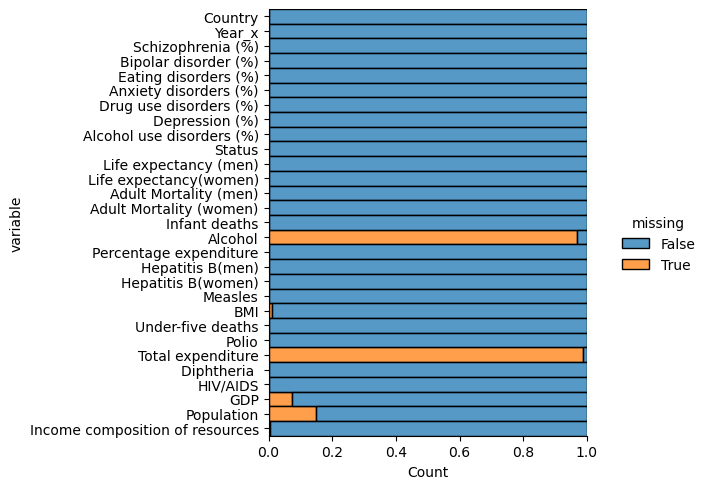

In [29]:
# Plot the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=mdata.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [30]:
# Dealing with missing values
# For BMI, replace missing values with the mean
# For Alcohol and Total expenditure, drop as we already have alcohol use disorders and percentage expenditure
# For Income composition of resources, replace with median

mdata['BMI'] = mdata['BMI'].fillna(mdata['BMI'].mean())

mdata['Income composition of resources'] = mdata['Income composition of resources'].fillna(mdata['Income composition of resources'].median())

mdata = mdata.drop(mdata.columns[[15, 23]], axis=1)


In [31]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          162 non-null    object 
 1   Year_x                           162 non-null    int64  
 2   Schizophrenia (%)                162 non-null    object 
 3   Bipolar disorder (%)             162 non-null    object 
 4   Eating disorders (%)             162 non-null    object 
 5   Anxiety disorders (%)            162 non-null    float64
 6   Drug use disorders (%)           162 non-null    float64
 7   Depression (%)                   162 non-null    float64
 8   Alcohol use disorders (%)        162 non-null    float64
 9   Status                           162 non-null    object 
 10  Life expectancy (men)            162 non-null    int64  
 11  Life expectancy(women)           162 non-null    int64  
 12  Adult Mortality (men) 

In [32]:
# Countries that have missing GDP and Population missing values
# GDP and status and effect on population
subset_missing = mdata[mdata.isnull().any(axis=1)]
subset_missing[['Country', 'GDP', 'Population']]

,Country,GDP,Population
4,Antigua and Barbuda,13566.954100,NaN
10,Bahamas,NaN,NaN
11,Bahrain,22688.878240,NaN
13,Barbados,15557.838100,NaN
34,Congo,NaN,NaN
37,Cuba,762.261218,NaN
43,Egypt,NaN,NaN
46,Eritrea,NaN,NaN
53,Gambia,NaN,NaN
58,Grenada,9212.192824,NaN


In [33]:
# Dropping the rows with missing values for GDP and Population
mdata = mdata.dropna()
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 161
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          137 non-null    object 
 1   Year_x                           137 non-null    int64  
 2   Schizophrenia (%)                137 non-null    object 
 3   Bipolar disorder (%)             137 non-null    object 
 4   Eating disorders (%)             137 non-null    object 
 5   Anxiety disorders (%)            137 non-null    float64
 6   Drug use disorders (%)           137 non-null    float64
 7   Depression (%)                   137 non-null    float64
 8   Alcohol use disorders (%)        137 non-null    float64
 9   Status                           137 non-null    object 
 10  Life expectancy (men)            137 non-null    int64  
 11  Life expectancy(women)           137 non-null    int64  
 12  Adult Mortality (men) 

In [34]:
# Changing data types that ought to be float from object
mdata["Schizophrenia (%)"] = mdata["Schizophrenia (%)"].astype(float)
mdata["Bipolar disorder (%)"] = mdata["Bipolar disorder (%)"].astype(float)
mdata["Eating disorders (%)"] = mdata["Eating disorders (%)"].astype(float)
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 161
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          137 non-null    object 
 1   Year_x                           137 non-null    int64  
 2   Schizophrenia (%)                137 non-null    float64
 3   Bipolar disorder (%)             137 non-null    float64
 4   Eating disorders (%)             137 non-null    float64
 5   Anxiety disorders (%)            137 non-null    float64
 6   Drug use disorders (%)           137 non-null    float64
 7   Depression (%)                   137 non-null    float64
 8   Alcohol use disorders (%)        137 non-null    float64
 9   Status                           137 non-null    object 
 10  Life expectancy (men)            137 non-null    int64  
 11  Life expectancy(women)           137 non-null    int64  
 12  Adult Mortality (men) 

# 4. Exploratory Data Analysis

Produce histograms showing the distributions of Life expectancy (men), Life expectancy(women), Depression (%).

The black vertical line indicates the mean of the datasets.

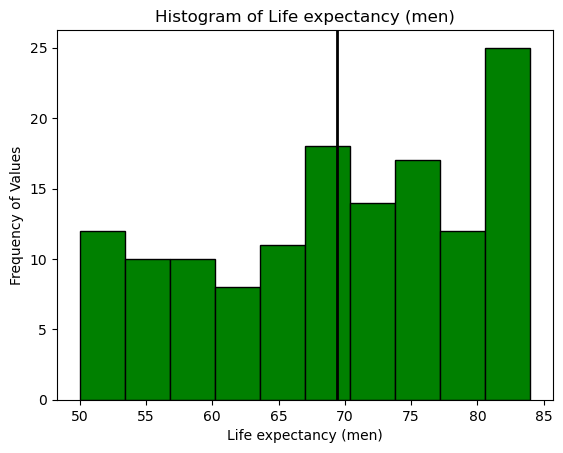

In [35]:
# Histogram of Life expectancy (men)

plt.hist(mdata['Life expectancy (men)'], bins = 10, color = "green", edgecolor = 'black')

plt.xlabel('Life expectancy (men)')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Life expectancy (men)')

# Mean of Life expectancy (men)
plt.axvline(mdata['Life expectancy (men)'].mean(), color = "black", linewidth = 2)
plt.show()

In [36]:
# Mean
mdata['Life expectancy (men)'].mean()

# Median
mdata['Life expectancy (men)'].median()

# Standard deviation
mdata['Life expectancy (men)'].std()

10.274438344627537

Interpretation of information

In [37]:
"""
Mean of Life expectancy (men) is 68.9
Median of Life expectancy (men) is 69.5
Standard deviation of Life expectancy (men) is 10.315

"""

'\nMean of Life expectancy (men) is 68.9\nMedian of Life expectancy (men) is 69.5\nStandard deviation of Life expectancy (men) is 10.315\n\n'

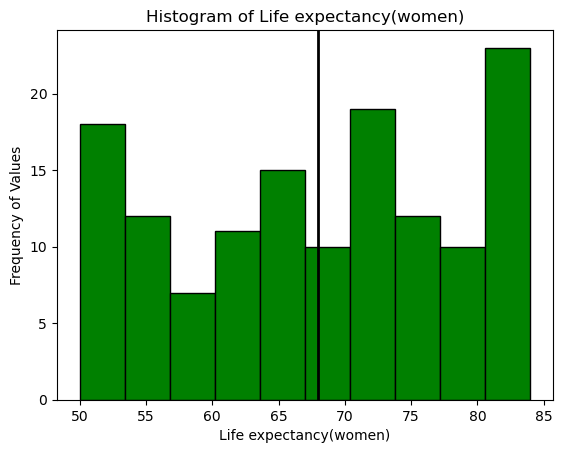

In [38]:
# Histogram of Life expectancy (men)

plt.hist(mdata['Life expectancy(women)'], bins = 10, color = "green", edgecolor = 'black')

plt.xlabel('Life expectancy(women)')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Life expectancy(women)')

# Mean of Life expectancy(women)
plt.axvline(mdata['Life expectancy(women)'].mean(), color = "black", linewidth = 2)
plt.show()

Interpretation of information

In [39]:
# Mean
mdata['Life expectancy(women)'].mean()

# Median
mdata['Life expectancy(women)'].median()

# Standard deviation
mdata['Life expectancy(women)'].std()

10.347151617064371

In [40]:
"""
Mean of Life expectancy(women) is 68.17
Median of Life expectancy(women) is 69.0
Standard deviation of Life expectancy(women)​ is 10.32

"""

'\nMean of Life expectancy(women) is 68.17\nMedian of Life expectancy(women) is 69.0\nStandard deviation of Life expectancy(women)\u200b is 10.32\n\n'

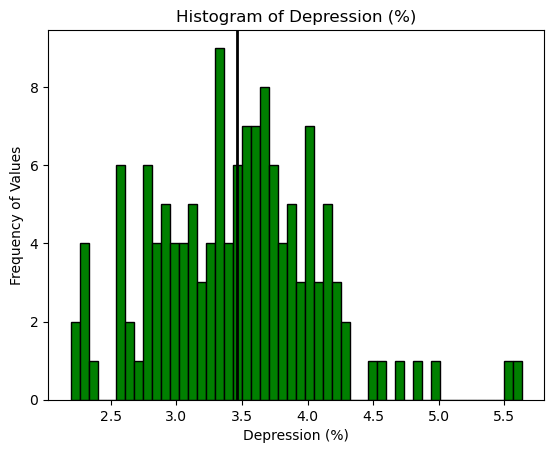

In [41]:
# Histogram of Depression(%)

plt.hist(mdata['Depression (%)'], bins =50, color = "green", edgecolor = 'black')

plt.xlabel('Depression (%)')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Depression (%)')

# Mean of Depression(%)
plt.axvline(mdata['Depression (%)'].mean(), color = "black", linewidth = 2)
plt.show()

Interpretation of information

In [42]:
# Mean
mdata['Depression (%)'].mean()

# Median
mdata['Depression (%)'].median()

# Standard deviation
mdata['Depression (%)'].std()

0.6326388309776323

In [43]:
"""
Mean of Depression (%) is 3.44
Median of Depression (%)) is 3.459
Standard deviation of Depression (%) is 0.617

"""

'\nMean of Depression (%) is 3.44\nMedian of Depression (%)) is 3.459\nStandard deviation of Depression (%) is 0.617\n\n'

# Exploring Correlations in our Dataset

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_10912\932123637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCorr = mdata.corr()


<Axes: >

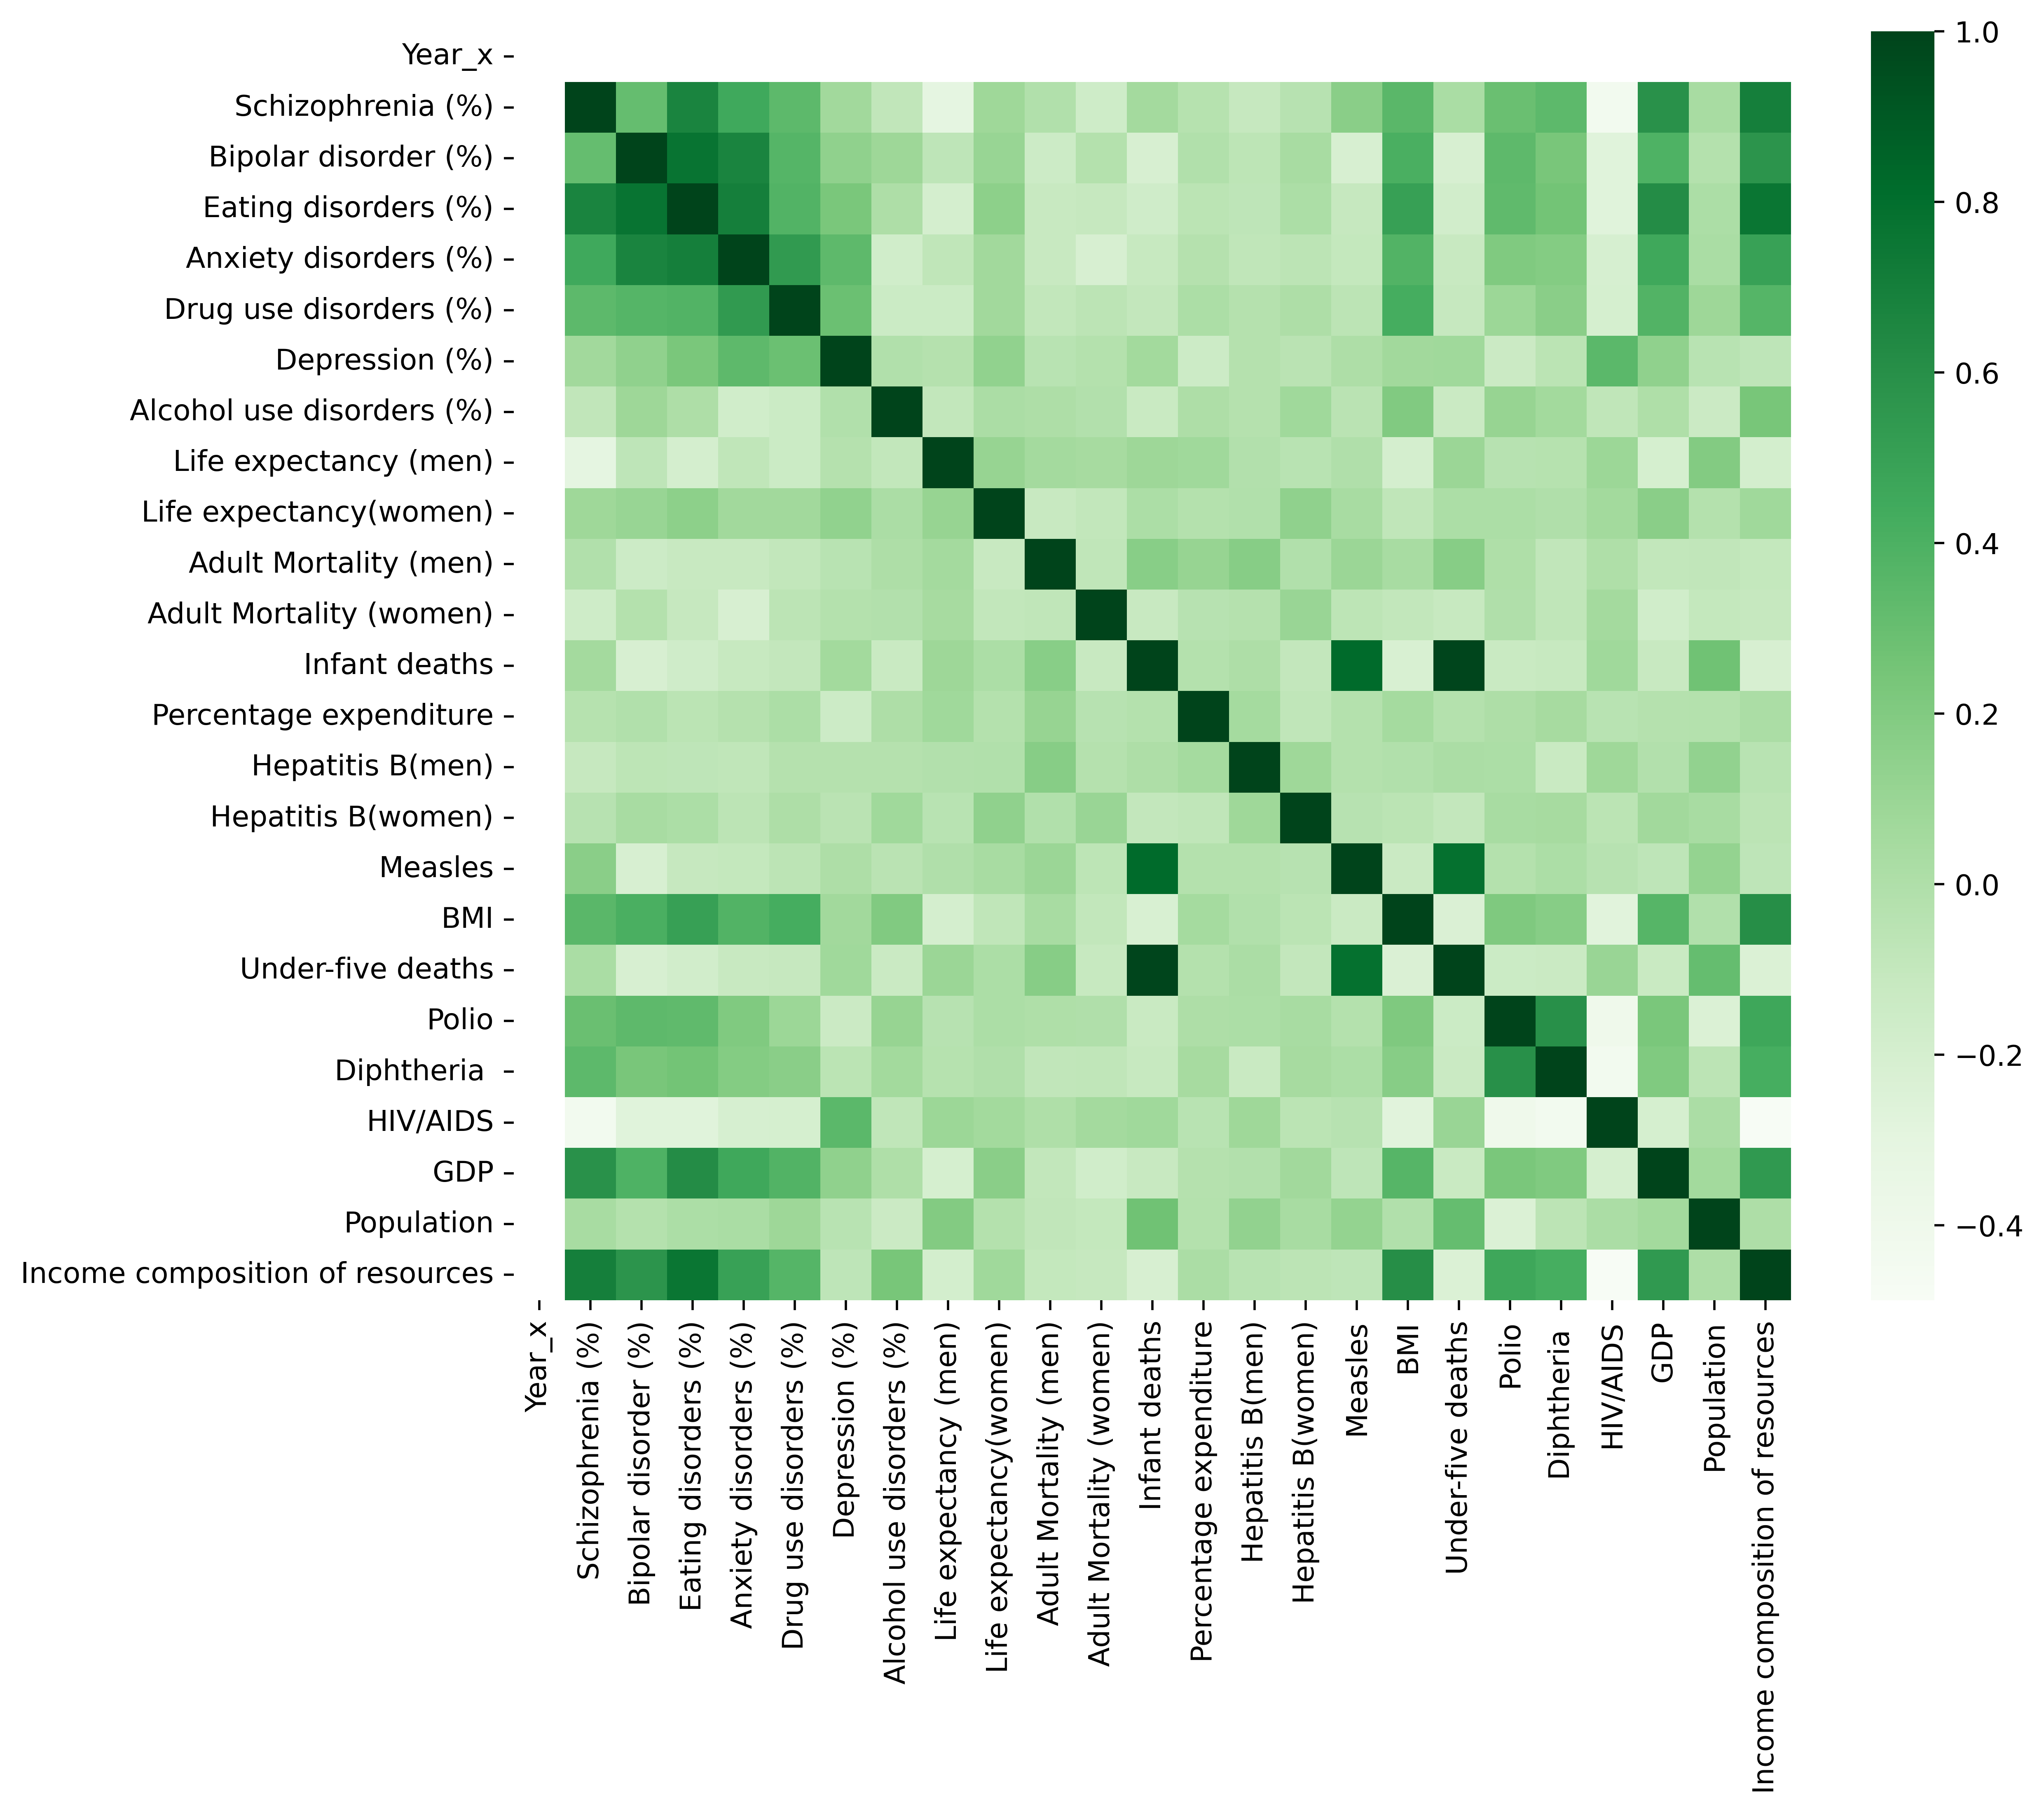

In [98]:
import seaborn as sb
dfCorr = mdata.corr()
#filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.5))]
plt.figure(figsize=(10,8), dpi =500)
sb.heatmap(dfCorr, cmap="Greens", annot=False)

In [45]:
ea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 24 to 153
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          5 non-null      object 
 1   Year_x                           5 non-null      int64  
 2   Schizophrenia (%)                5 non-null      float64
 3   Bipolar disorder (%)             5 non-null      float64
 4   Eating disorders (%)             5 non-null      float64
 5   Anxiety disorders (%)            5 non-null      float64
 6   Drug use disorders (%)           5 non-null      float64
 7   Depression (%)                   5 non-null      float64
 8   Alcohol use disorders (%)        5 non-null      float64
 9   Status                           5 non-null      object 
 10  Life expectancy (men)            5 non-null      int64  
 11  Life expectancy(women)           5 non-null      int64  
 12  Adult Mortality (men)  

In [46]:
# Filter 5 sample countries in Euope
europe = mdata[(mdata['Country'] == 'France') | (mdata['Country'] == 'Belgium') | 
           (mdata['Country'] == 'Germany') | (mdata['Country'] == 'Sweden') | (mdata['Country'] == 'Denmark')]
europe

,Country,Year_x,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Status,...,Hepatitis B(women),Measles,BMI,Under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources
15,Belgium,2015,0.257675,0.946314,0.598318,5.208646,0.819489,4.110452,1.456476,Developed,...,33,47,63.7,1,99.0,99.0,0.1,4356.87500,11274196.0,0.895
39,Denmark,2015,0.254433,1.005441,0.540710,5.315579,0.877252,3.281306,1.760998,Developed,...,18,9,58.8,0,93.0,93.0,0.1,5314.64416,5683483.0,0.923
51,France,2015,0.256537,0.959573,0.569338,6.637445,1.204663,4.299326,1.457863,Developing,...,44,157,62.5,3,98.0,98.0,0.1,36526.77110,6662468.0,0.894
55,Germany,2015,0.251720,0.779517,0.522847,6.566759,0.893847,3.946206,1.927178,Developed,...,65,2464,62.3,3,94.0,95.0,0.1,41176.88158,81686611.0,0.924
143,Sweden,2015,0.273600,1.058289,0.564692,5.297058,0.683427,4.513444,1.721177,Developed,...,23,22,59.5,0,98.0,98.0,0.1,5585.25847,9799186.0,0.909


In [51]:
# Append ea and europe
combined_eaeurope = ea.append(europe)
combined_eaeurope

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_10912\378042410.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_eaeurope = ea.append(europe)


,Country,Year_x,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Status,...,Hepatitis B(women),Measles,BMI,Under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources
24,Burundi,2015,0.153772,0.612157,0.089309,3.574121,0.496275,3.723271,1.575593,Developing,...,20,9,18.7000,31,94.0,94.0,0.7,33.681223,119927.0,0.406
77,Kenya,2015,0.170214,0.641196,0.131502,3.630832,0.483446,3.514888,1.249349,Developing,...,54,95,22.0000,75,83.0,89.0,2.8,1349.971440,47236259.0,0.550
121,Rwanda,2015,0.162693,0.624513,0.112160,3.689279,0.588300,3.854341,2.347621,Developing,...,53,1,21.4000,15,99.0,98.0,0.4,71.348397,11629553.0,0.493
137,South Sudan,2015,0.168795,0.625260,0.135115,3.535399,0.499741,3.686892,1.551948,Developing,...,67,878,43.1375,39,41.0,31.0,3.4,758.725782,11882136.0,0.421
153,Uganda,2015,0.159609,0.609275,0.117042,3.510482,0.539442,4.996004,1.292387,Developing,...,24,478,18.5000,93,82.0,78.0,3.1,693.896383,414487.0,0.488
15,Belgium,2015,0.257675,0.946314,0.598318,5.208646,0.819489,4.110452,1.456476,Developed,...,33,47,63.7000,1,99.0,99.0,0.1,4356.875000,11274196.0,0.895
39,Denmark,2015,0.254433,1.005441,0.540710,5.315579,0.877252,3.281306,1.760998,Developed,...,18,9,58.8000,0,93.0,93.0,0.1,5314.644160,5683483.0,0.923
51,France,2015,0.256537,0.959573,0.569338,6.637445,1.204663,4.299326,1.457863,Developing,...,44,157,62.5000,3,98.0,98.0,0.1,36526.771100,6662468.0,0.894
55,Germany,2015,0.251720,0.779517,0.522847,6.566759,0.893847,3.946206,1.927178,Developed,...,65,2464,62.3000,3,94.0,95.0,0.1,41176.881580,81686611.0,0.924
143,Sweden,2015,0.273600,1.058289,0.564692,5.297058,0.683427,4.513444,1.721177,Developed,...,23,22,59.5000,0,98.0,98.0,0.1,5585.258470,9799186.0,0.909


In [54]:
# Attribute check
combined_eaeurope.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 24 to 143
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10 non-null     object 
 1   Year_x                           10 non-null     int64  
 2   Schizophrenia (%)                10 non-null     float64
 3   Bipolar disorder (%)             10 non-null     float64
 4   Eating disorders (%)             10 non-null     float64
 5   Anxiety disorders (%)            10 non-null     float64
 6   Drug use disorders (%)           10 non-null     float64
 7   Depression (%)                   10 non-null     float64
 8   Alcohol use disorders (%)        10 non-null     float64
 9   Status                           10 non-null     object 
 10  Life expectancy (men)            10 non-null     int64  
 11  Life expectancy(women)           10 non-null     int64  
 12  Adult Mortality (men) 

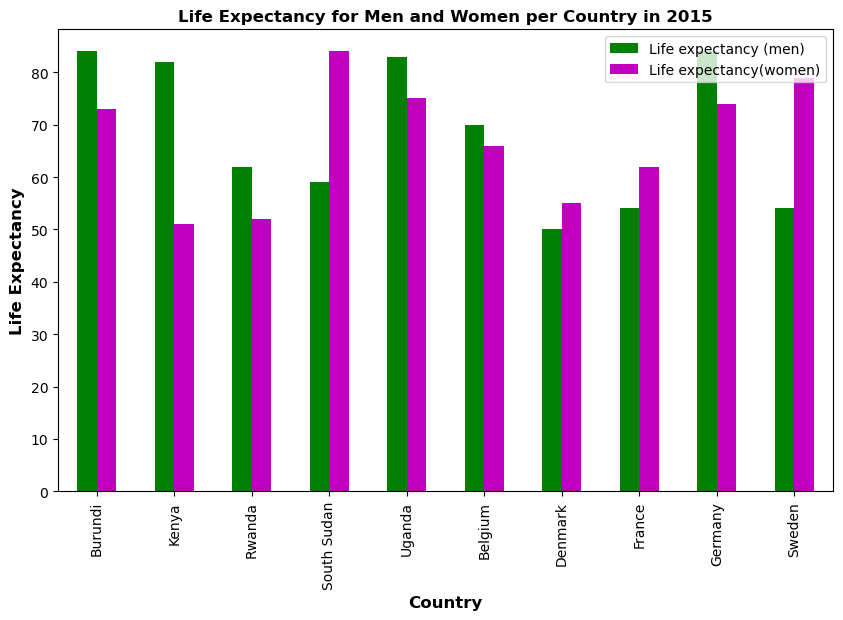

In [58]:
# Life expectancy comparison per country in 2015
# Dodged bar graph

my_color =['green','m']

combined_eaeurope.plot(x="Country", y=["Life expectancy (men)", "Life expectancy(women)"], kind="bar",
 figsize=(10,6), color=my_color)

# Add labels
plt.title("Life Expectancy for Men and Women per Country in 2015",fontweight='bold')
plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.ylabel("Life Expectancy", fontsize=12, fontweight='bold')

plt.show()

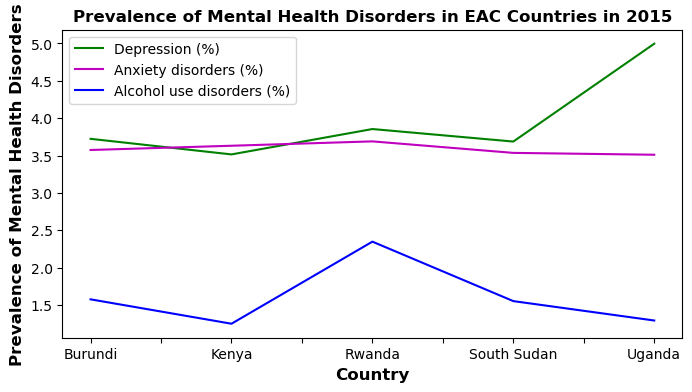

In [100]:
# Prevalence of Mental Health Disorders in EAC Countries in 2015
my_color =['green','m', "blue"]

ea.plot(x="Country", y=["Depression (%)", "Anxiety disorders (%)", 
                        "Alcohol use disorders (%)"], kind="line",
 figsize=(8,4), color=my_color)

# Add labels
plt.title("Prevalence of Mental Health Disorders in EAC Countries in 2015",fontweight='bold')
plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.ylabel("Prevalence of Mental Health Disorders", fontsize=12, fontweight='bold')

# Add legend

plt.legend()

plt.show()

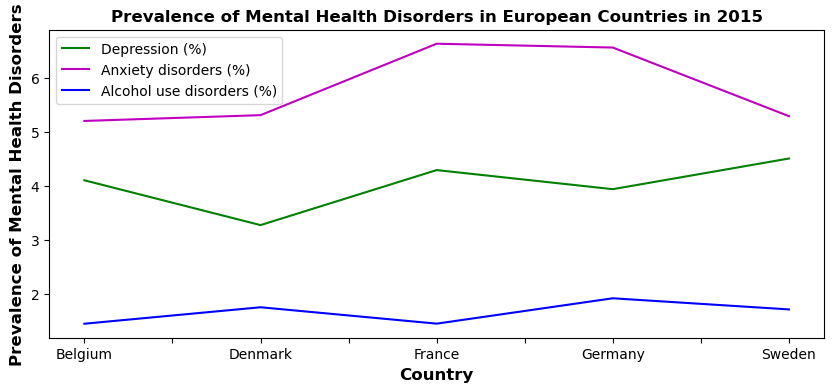

In [95]:
# Prevalence of Mental Health Disorders in European Countries in 2015 
my_color =['green','m', "blue"]

europe.plot(x="Country", y=["Depression (%)", "Anxiety disorders (%)", 
                        "Alcohol use disorders (%)"], kind="line",
 figsize=(10,4), color=my_color)

# Add labels
plt.title("Prevalence of Mental Health Disorders in European Countries in 2015",fontweight='bold')
plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.ylabel("Prevalence of Mental Health Disorders", fontsize=12, fontweight='bold')

# Add legend

plt.legend()

plt.show()

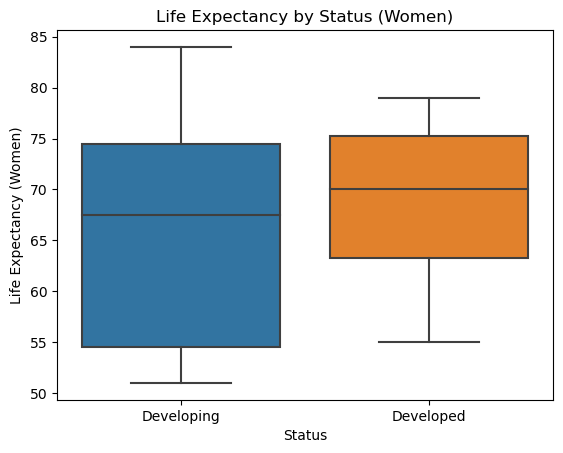

In [105]:
# Life Expectancy for women distribution by status for ea and europe sample data
sns.boxplot(x="Status", y="Life expectancy(women)", data=combined_eaeurope)
plt.xlabel("Status")
plt.ylabel("Life Expectancy (Women)")
plt.title("Life Expectancy by Status (Women)")
plt.show()

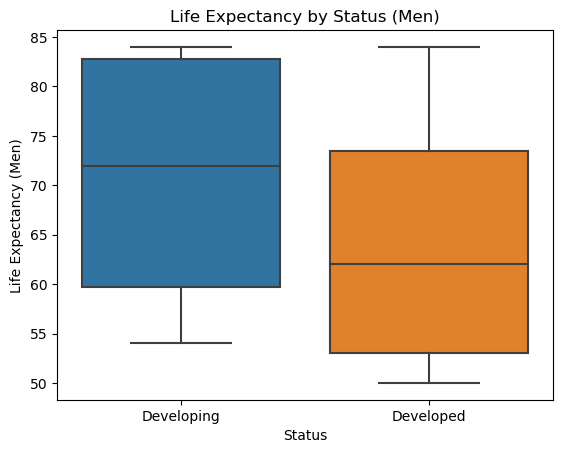

In [106]:
# Life expectancy for Men by status for ea and europe sample data
sns.boxplot(x="Status", y="Life expectancy (men)", data=combined_eaeurope)
plt.xlabel("Status")
plt.ylabel("Life Expectancy (Men)")
plt.title("Life Expectancy by Status (Men)")
plt.show()

To demonstrate whether drug use disorders has an effect on life expectancy.

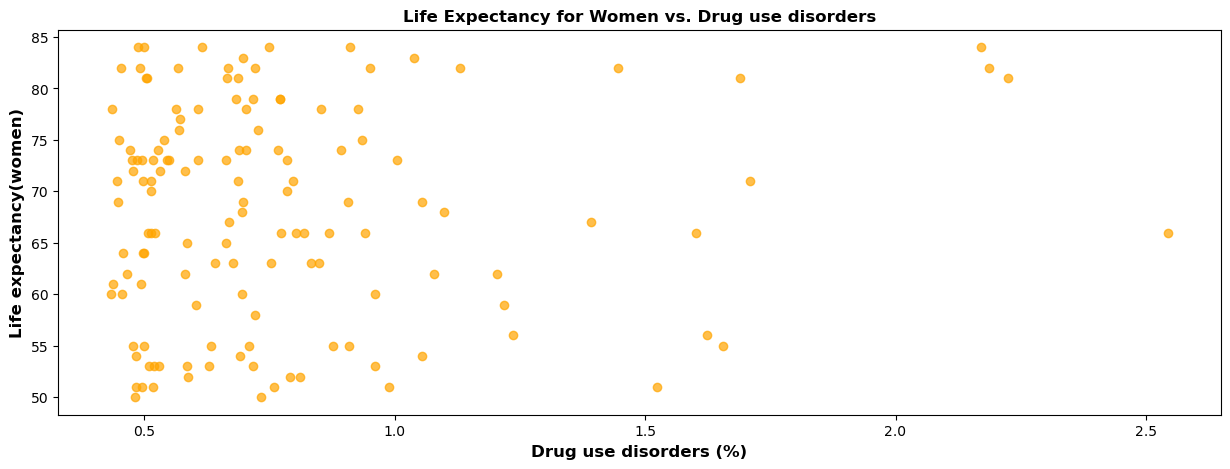

In [72]:
# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Life Expectancy for Women vs. Drug use disorders
# Lesser drug use results to a higher concentration of people living longer
ax.scatter(mdata["Drug use disorders (%)"], mdata["Life expectancy(women)"], 
           alpha=0.7, color="orange")
ax.set_title("Life Expectancy for Women vs. Drug use disorders", fontsize=12, fontweight='bold')
ax.set_xlabel("Drug use disorders (%)", fontsize=12, fontweight='bold')
ax.set_ylabel("Life expectancy(women)", fontsize=12, fontweight='bold');

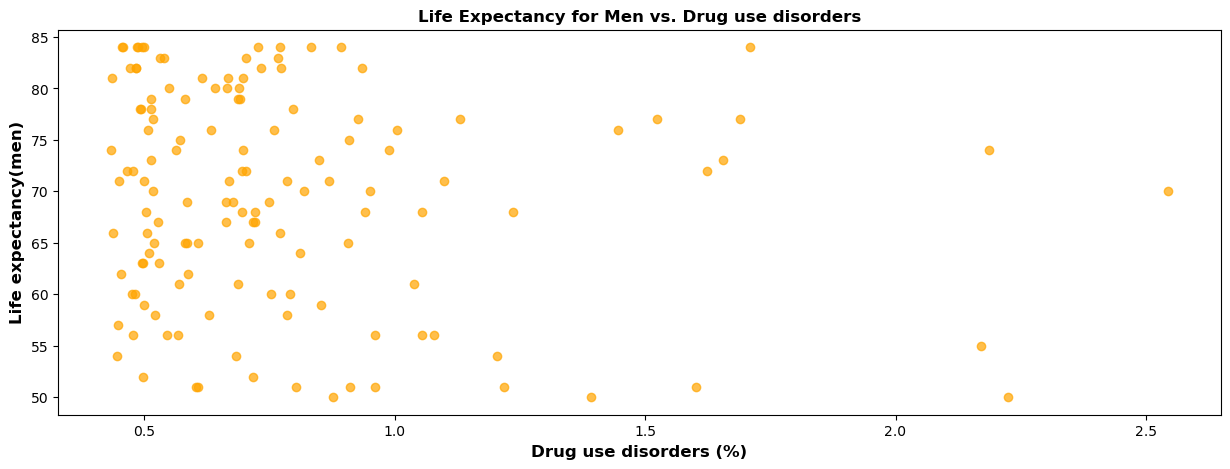

In [73]:
# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Life Expectancy for Women vs. Drug use disorders
# Lesser drug use results to a higher concentration of people living longer
ax.scatter(mdata["Drug use disorders (%)"], mdata["Life expectancy (men)"], 
           alpha=0.7, color="orange")
ax.set_title("Life Expectancy for Men vs. Drug use disorders", fontsize=12, fontweight='bold')
ax.set_xlabel("Drug use disorders (%)", fontsize=12, fontweight='bold')
ax.set_ylabel("Life expectancy(men)", fontsize=12, fontweight='bold');

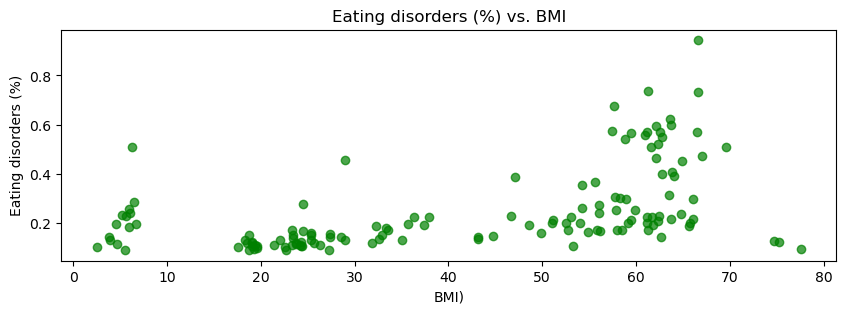

In [93]:
# Set up plot
fig, ax = plt.subplots(figsize=(10,3))

# Alcohol use disorders vs Depression
# Higher eating disorders, higher BMI
ax.scatter(mdata["BMI"], mdata["Eating disorders (%)"], alpha=0.7, color="green")
ax.set_title("Eating disorders (%) vs. BMI")
ax.set_xlabel("BMI)")
ax.set_ylabel("Eating disorders (%)");

Text(0, 0.5, 'Depression (%)')

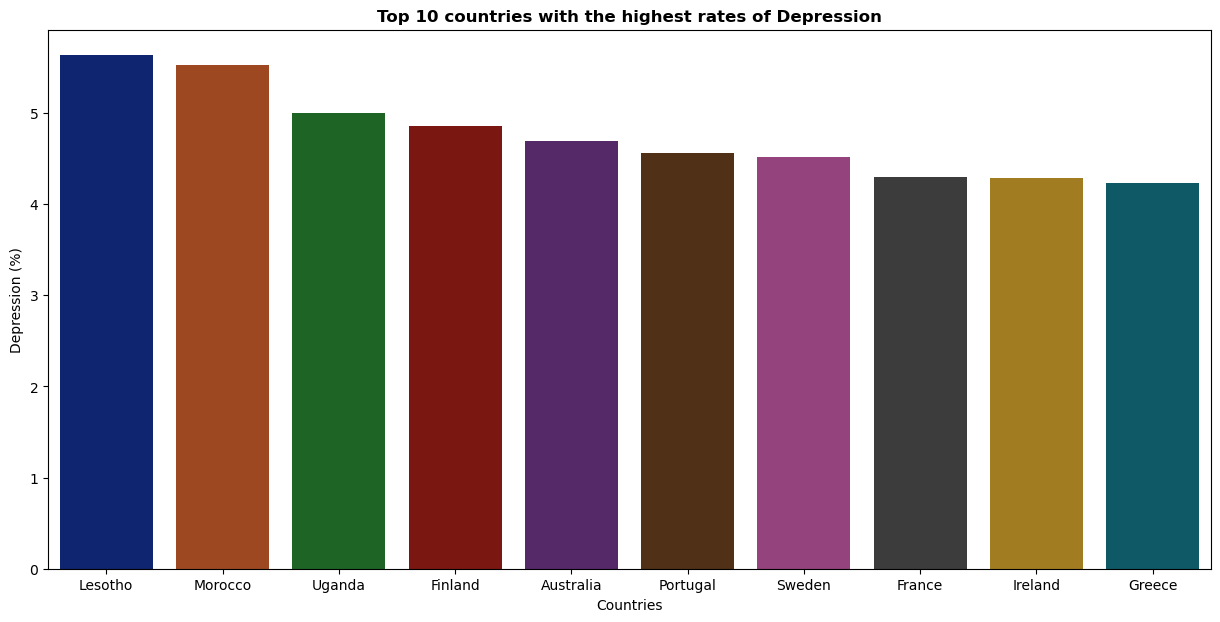

In [102]:
# Top 10 Countries with the highest depression rates
plt.figure(figsize = (15,7))
sns.barplot(data = mdata,
            x = 'Country',
            y = 'Depression (%)',
            order = mdata.sort_values('Depression (%)', ascending = False).Country.head(10),
            palette = 'dark')

#Set title, legend and x y axis
plt.title('Top 10 countries with the highest rates of Depression',
          fontweight='bold')

plt.xlabel('Countries')
plt.ylabel('Depression (%)')

Text(0, 0.5, 'GDP')

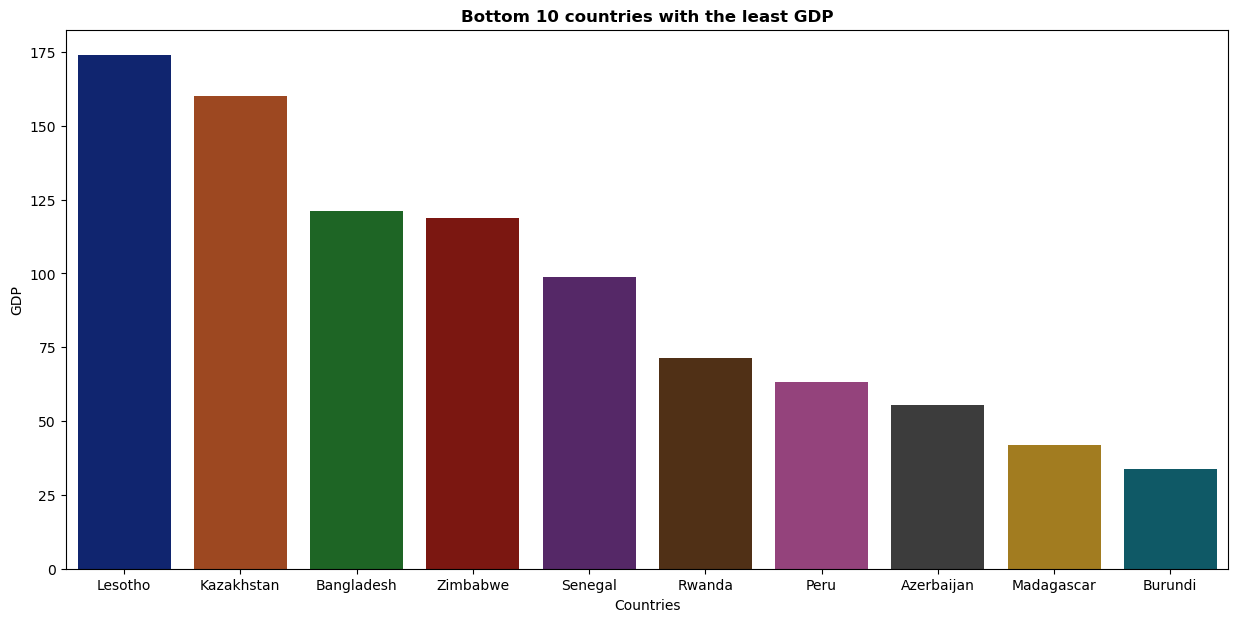

In [81]:
# Bottom 10 Countries with the least GDP
plt.figure(figsize = (15,7))
sns.barplot(data = mdata,
            x = 'Country',
            y = 'GDP',
            order = mdata.sort_values('GDP', ascending = False).Country.tail(10),
            palette = 'dark')

#Set title, legend and x y axis
plt.title('Bottom 10 countries with the least GDP',
          fontweight='bold')

plt.xlabel('Countries')
plt.ylabel('GDP')

# 4. Conclusion

1. Drug use has a positive correlation with life expectany. The higher the drug use, the shorter the life expectancy.
2. There's a positive correlation between eating disorders and BMI.
3. Uganda had the highest depression rates in comparison to the other EAC countries while Kenya had the least. In Europe,
Sweden had the highest depression rates in comparison to the other European countries while Denmark had the least rates.
4. 


# 5. Recommendations

1.

2.

3.


Beneficiaries of the results/ outcome from the project;
1. Hospitals, health institutions
2. Non-government Organizations (NGOs) e.g WHO
3. Leaders within society to champion for research resources and funding

Future Work

A data scientist will never have enough time to explore all aspects of dataset. If you had more time, what other aspects of the dataset would you explore?

1. Predictive analytics using Machine Learning models; Regression etc

2.

3.


# 6. Thank you.